In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU
from keras import backend

Using TensorFlow backend.


In [2]:
data = pd.read_csv('training3.csv')

In [3]:
print(data)

        Stock Price  Strike Price  Maturity  Dividends  Volatility  Risk-free  \
0        206.484182    194.386150  1.093151   0.005674    0.862692   0.058898   
1         79.581809     73.926431  0.843836   0.020428    0.759562   0.080634   
2        130.957110    154.101232  1.326027   0.019181    0.606436   0.042031   
3         53.020511     58.598175  0.791781   0.028475    0.572696   0.036566   
4        455.190704    529.570396  0.501370   0.009074    0.090578   0.044426   
...             ...           ...       ...        ...         ...        ...   
299995   350.089693    297.253216  2.290411   0.024958    0.798014   0.065783   
299996   298.185427    349.183746  1.232877   0.025116    0.258656   0.098986   
299997    75.461971     94.875668  2.473973   0.017064    0.765170   0.015199   
299998   498.375137    360.035145  2.260274   0.025877    0.119936   0.029400   
299999   280.009181    296.958706  0.249315   0.008176    0.184513   0.057586   

        Call Price  
0     

In [4]:
## Normalize the data exploiting the fact that the BS Model is linear homogenous in S,K
data["Stock Price"] = data["Stock Price"]/data["Strike Price"]
data["Call Price"] = data["Call Price"]/data["Strike Price"]

In [5]:
print(data)

        Stock Price  Strike Price  Maturity  Dividends  Volatility  Risk-free  \
0          1.062237    194.386150  1.093151   0.005674    0.862692   0.058898   
1          1.076500     73.926431  0.843836   0.020428    0.759562   0.080634   
2          0.849812    154.101232  1.326027   0.019181    0.606436   0.042031   
3          0.904815     58.598175  0.791781   0.028475    0.572696   0.036566   
4          0.859547    529.570396  0.501370   0.009074    0.090578   0.044426   
...             ...           ...       ...        ...         ...        ...   
299995     1.177749    297.253216  2.290411   0.024958    0.798014   0.065783   
299996     0.853950    349.183746  1.232877   0.025116    0.258656   0.098986   
299997     0.795377     94.875668  2.473973   0.017064    0.765170   0.015199   
299998     1.384240    360.035145  2.260274   0.025877    0.119936   0.029400   
299999     0.942923    296.958706  0.249315   0.008176    0.184513   0.057586   

        Call Price  
0     

In [6]:
n = 300000
n_train =  (int)(0.8 * n)
train = data[0:n_train]

In [7]:
print(train)

        Stock Price  Strike Price  Maturity  Dividends  Volatility  Risk-free  \
0          1.062237    194.386150  1.093151   0.005674    0.862692   0.058898   
1          1.076500     73.926431  0.843836   0.020428    0.759562   0.080634   
2          0.849812    154.101232  1.326027   0.019181    0.606436   0.042031   
3          0.904815     58.598175  0.791781   0.028475    0.572696   0.036566   
4          0.859547    529.570396  0.501370   0.009074    0.090578   0.044426   
...             ...           ...       ...        ...         ...        ...   
239995     1.274442    150.103170  0.857534   0.013302    0.567847   0.062433   
239996     0.967148    188.313518  2.131507   0.004345    0.707577   0.079499   
239997     0.831508    183.053470  2.287671   0.022924    0.576246   0.035188   
239998     0.907767    545.414520  2.931507   0.023927    0.342367   0.011960   
239999     1.173114    217.761045  0.701370   0.001961    0.325961   0.022157   

        Call Price  
0     

In [8]:
index = data.index
columns = data.columns
values = data.values

train['Strike']

In [9]:
X_train = train[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_train = train['Call Price'].values
test = data[n_train+1:n]
X_test = test[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_test = test['Call Price'].values

In [10]:
def custom_activation(x):
    return backend.exp(x)

In [11]:
nodes = 120
model = Sequential()

model.add(Dense(nodes, input_dim=X_train.shape[1]))
model.add(LeakyReLU())
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='elu'))
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='elu'))
model.add(Dropout(0.25))

model.add(Dense(1))
model.add(Activation(custom_activation))

model.compile(loss='mse',optimizer='rmsprop')





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [12]:
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.1, verbose=3)


Train on 216000 samples, validate on 24000 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [13]:
import matplotlib.pyplot as plt
from pylab import *

In [14]:
def CheckAccuracy(y,y_hat):
    stats = dict()

    stats['diff'] = y - y_hat

    #stats['mse'] = mean(stats['diff']**2)
    #print("Mean Squared Error:      ", stats['mse'])

    #stats['rmse'] = sqrt(stats['mse'])
    #print("Root Mean Squared Error: ", stats['rmse'])

    #stats['mae'] = mean(abs(stats['diff']))
    #print("Mean Absolute Error:     ", stats['mae'])

    #stats['mpe'] = sqrt(stats['mse'])/mean(y)
    #print("Mean Percent Error:      ", stats['mpe'])

    #plots
    mpl.rcParams['agg.path.chunksize'] = 100000
    figure(figsize=(14,10))
    plt.scatter(y, y_hat,color='black',linewidth=0.3,alpha=0.4, s=0.5)
    plt.xlabel('Actual Price',fontsize=20,fontname='Times New Roman')
    plt.ylabel('Predicted Price',fontsize=20,fontname='Times New Roman')
    plt.show()

    figure(figsize=(14,10))
    plt.hist(stats['diff'], bins=50,edgecolor='black',color='white')
    plt.xlabel('Diff')
    plt.ylabel('Density')
    plt.show()

    return stats

In [15]:
def squeeze(y_train_hat):
    list2 = []
    for element in y_train_hat:
        list2.append(element)
    return list2

In [16]:
y_train_hat = model.predict(X_train)
#reduce dim (240000,1) -> (240000,) to match y_train's dim
#y_train_hat = squeeze(y_train_hat)
#CheckAccuracy(y_train, y_train_hat)
print(y_train_hat)
print(y_train)

[[0.42504996]
 [0.35335463]
 [0.19947094]
 ...
 [0.23444593]
 [0.17219064]
 [0.25009337]]
[0.40864169 0.33784285 0.18771909 ... 0.22594855 0.15432559 0.23324567]


In [17]:
X = np.reshape(y_train_hat, (-1))

In [18]:
print(X)

[0.42504996 0.35335463 0.19947094 ... 0.23444593 0.17219064 0.25009337]


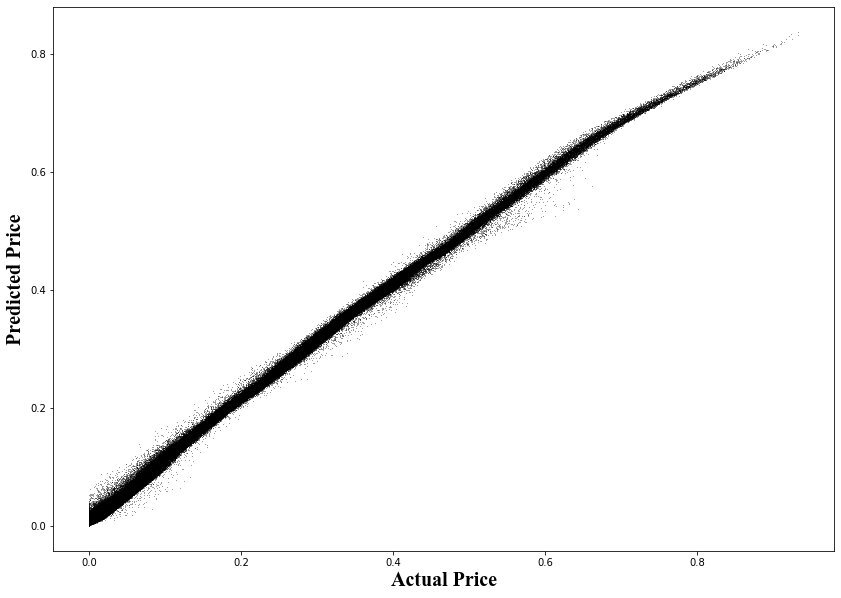

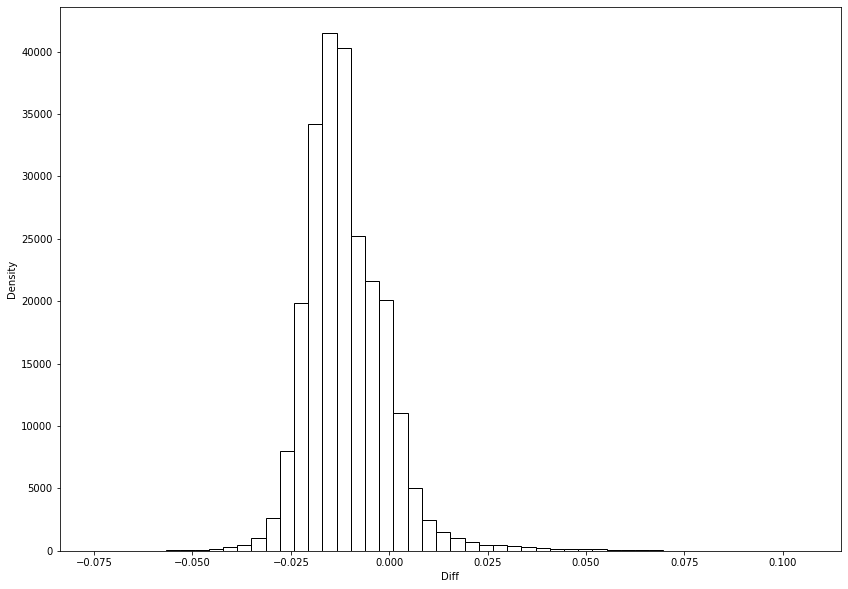

{'diff': array([-0.01640827, -0.01551178, -0.01175185, ..., -0.00849738,
        -0.01786505, -0.0168477 ])}

In [19]:
CheckAccuracy(y_train, X)